<a href="https://colab.research.google.com/github/lasantha13/Colab/blob/main/Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:

#from google.colab import drive
#drive.mount('/content/drive')
#df = pd.read_csv('/content/drive/My Drive/Work/Applied stats/Pytohn/Breast cancer/data.csv')
df = pd.read_csv('data/data.csv')
df2 = df.copy()

https://rstudio-pubs-static.s3.amazonaws.com/329390_c397ce255b364013a933c34ba63c2db2.html

## New Section

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.929668e+01,4.301816e+00,9.710000,16.170000,18.870000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave_points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


## Descriptive Analytics

In [9]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


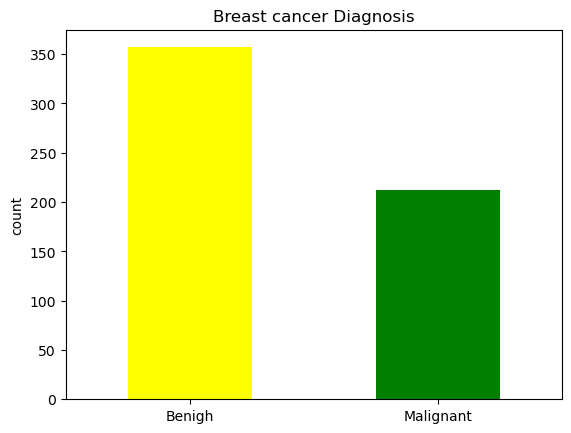

In [10]:
fig =df.diagnosis.value_counts().plot(kind='bar', color = ['yellow','green'])
fig.set_xticklabels(labels=['Benigh','Malignant'],rotation=360);
plt.title('Breast cancer Diagnosis')
plt.ylabel('count');

In [11]:
plt.figure(figsize=(10,6))
plt.scatter(df.Radius_mean[df.diagnosis=='B'],df.concavity_worst[df.diagnosis=='B'],color='green')
plt.scatter(df.Radius_mean[df.diagnosis=='M'],df.concavity_worst[df.diagnosis=='M'],color='Red')
plt.xlabel('Radius Mean')
plt.ylabel('Concavity Worst')
plt.legend(['Benign','Malignant'])
plt.title('Breasr Cancer Radius Mean aganist Concavity Worst');

AttributeError: 'DataFrame' object has no attribute 'Radius_mean'

<Figure size 1000x600 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df.Radius_mean[df.diagnosis=='B'],df.smoothness_mean[df.diagnosis=='B'],color='green')
plt.scatter(df.Radius_mean[df.diagnosis=='M'],df.smoothness_mean[df.diagnosis=='M'],color='Red')
plt.xlabel('Radius Mean')
plt.ylabel('Smoothness Mean')
plt.legend(['Benign','Malignant'])
plt.title('Breasr Cancer Radius Mean aganist Smoothness Mean');

In [ ]:
#Create script to genertate box [lot for all variable
#get column list 
df_col = df.drop(['id','diagnosis'],axis=1)
df_col2 = df_col.columns

In [ ]:
df_col2

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
fig, axes = plt.subplots(10, 3, figsize=(30,50))
a1 = 0
a2 = 0
for i, col in enumerate(df_col2):
  
  if a2 > 2:
    a2 = 0
    a1 = a1+1
  ax0 = axes[a1,a2]
  #sns.boxplot(data=df, x='diagnosis',y=col, ax=ax0)
  #print (i)
  #print(ax0)
  a2 = a2+1
  sns.boxplot(data=df, x='diagnosis',y=col, ax=ax0).set(title=f"Diagnosis Vs {col}")
plt.show()


## Data Wrangling

In [ ]:
#missing values
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
#check for outliars
df.shape

(569, 32)

In [ ]:
#create funtion for outliars
def clean_outlairs(df,column_list):
  for col1 in column_list:
    q1 = df[col1].quantile(0.25)
    q3 = df[col1].quantile(0.75)
    iqr = q3-q1
  #remove outliars
    df= df[((df[col1]> q1-1.5*iqr)&(df[col1]<q3+1.5*iqr))]
  return(df)



In [ ]:
 df_no_outliars =clean_outlairs(df,df_col2)
 df_no_outliars.shape

(277, 32)

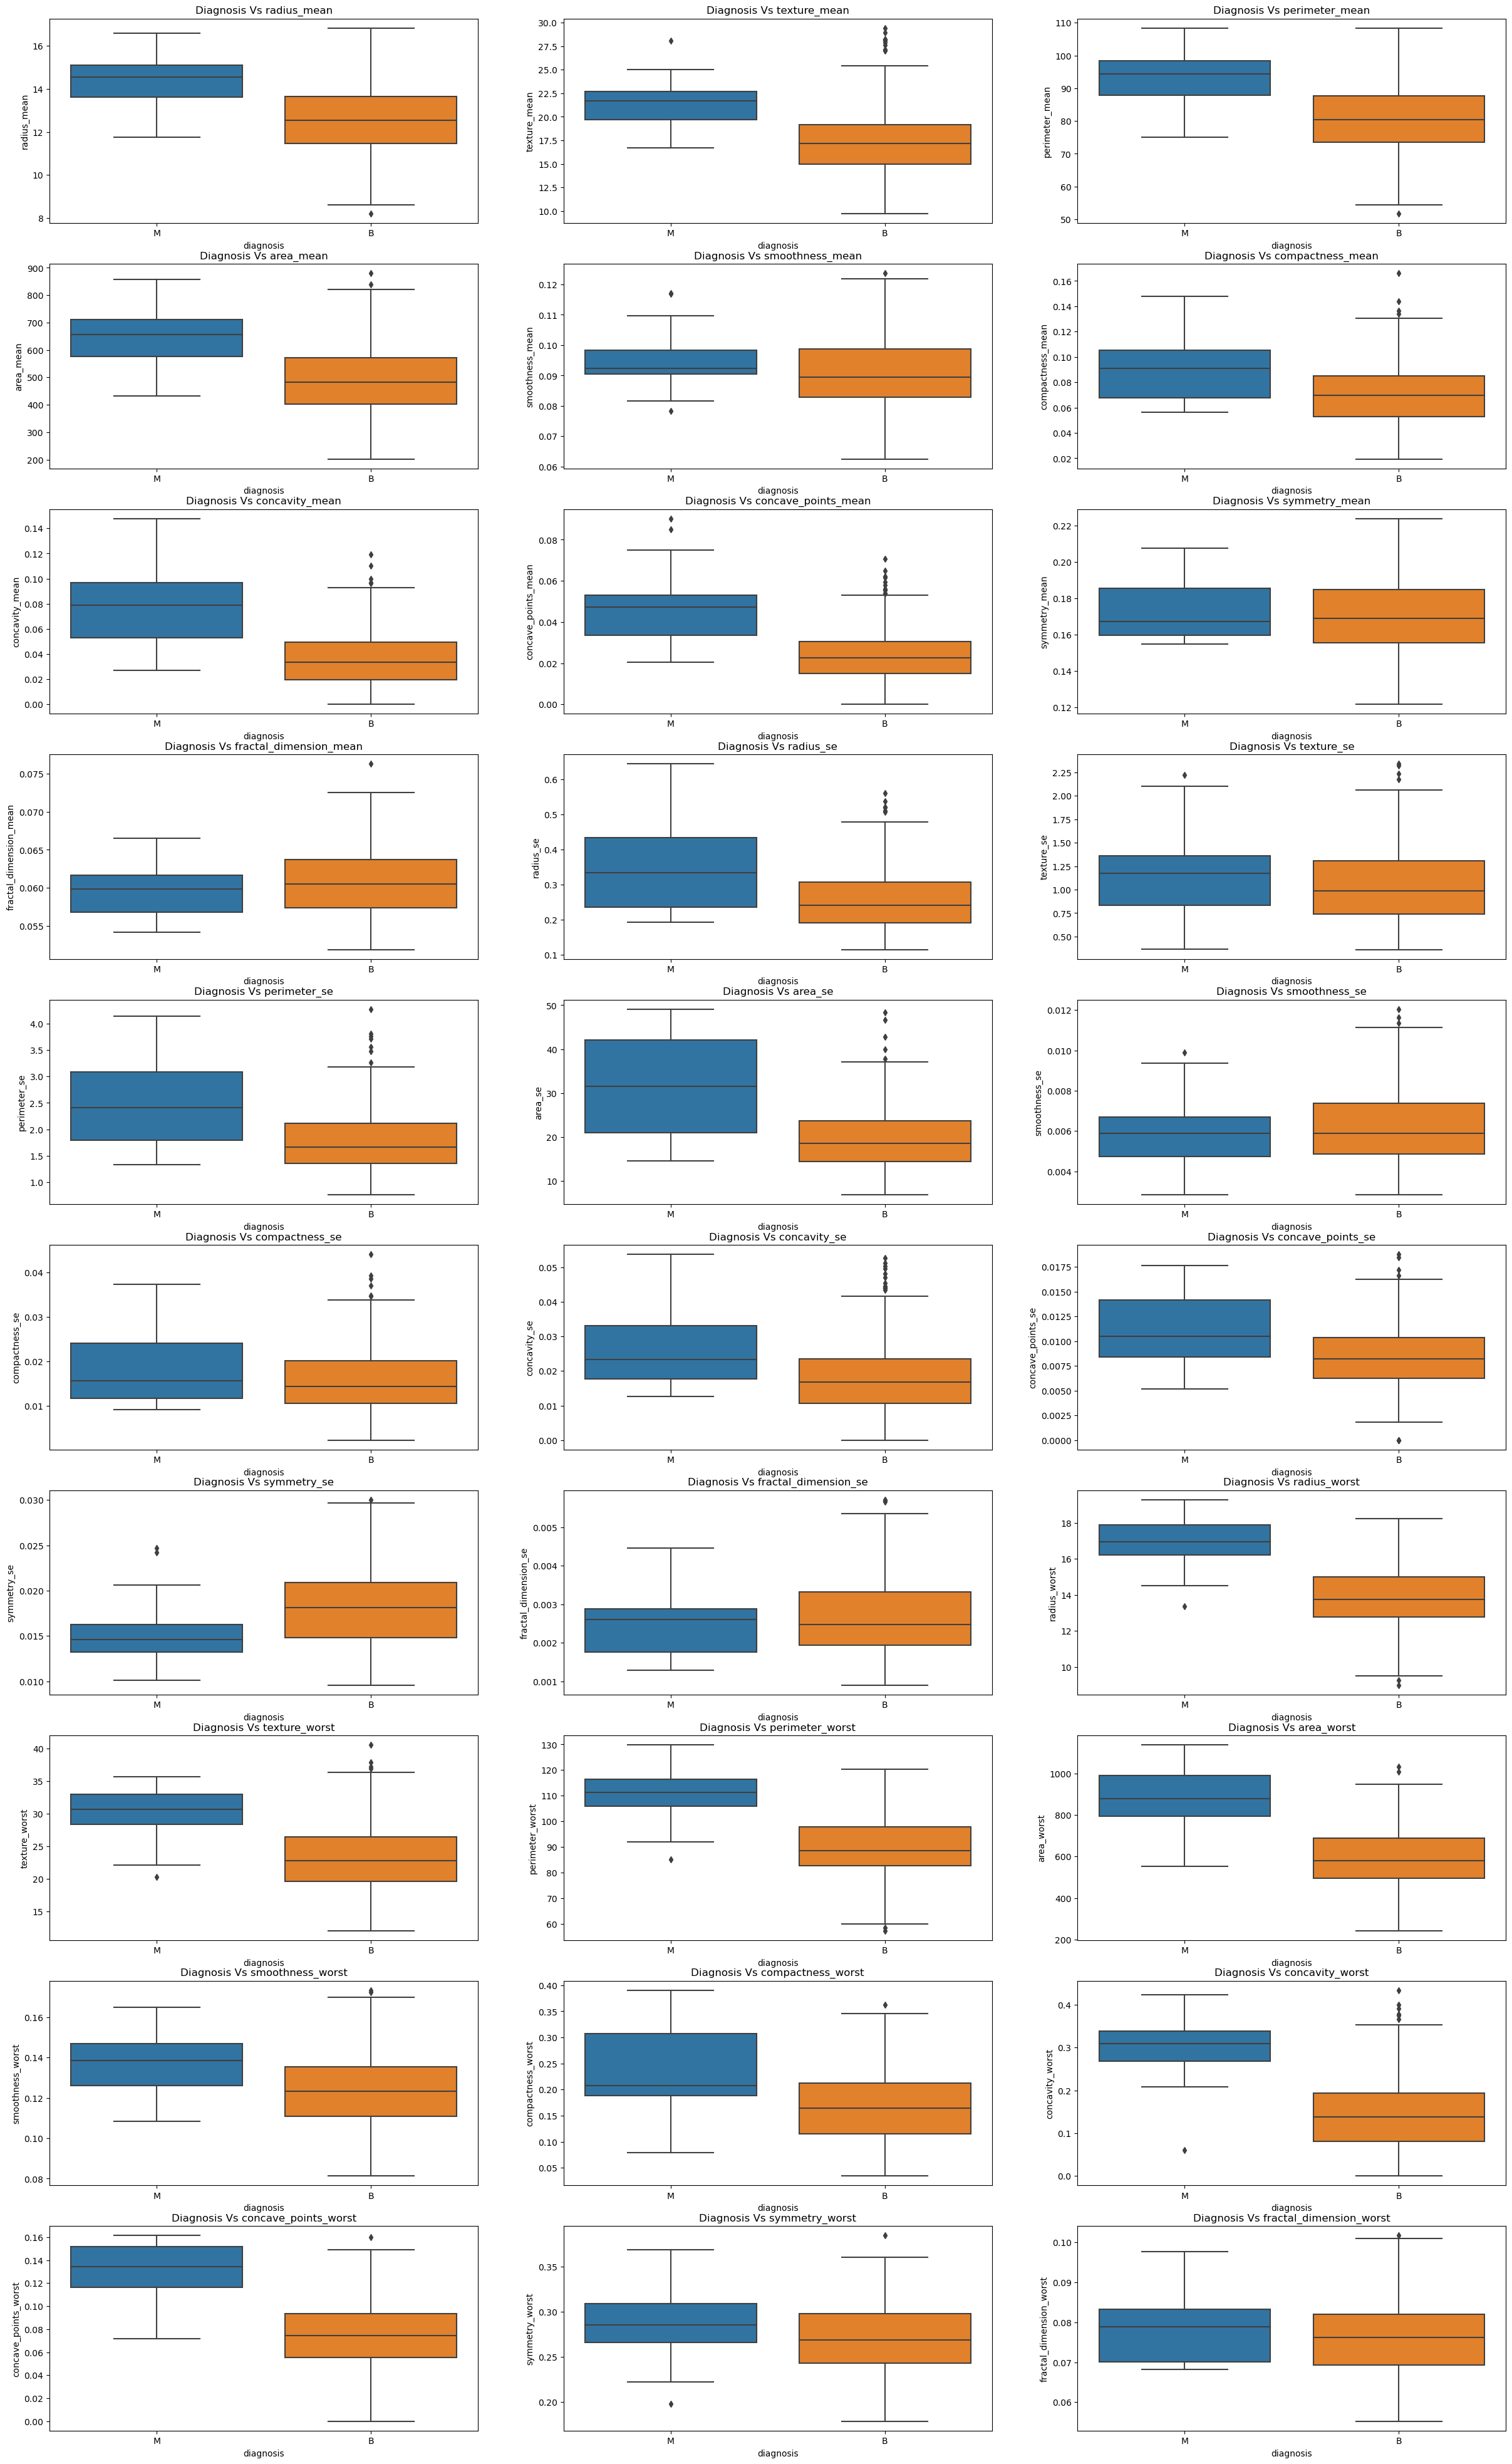

In [ ]:
fig, axes = plt.subplots(10, 3, figsize=(30,50))
a1 = 0
a2 = 0
for i, col in enumerate(df_col2):
  
  if a2 > 2:
    a2 = 0
    a1 = a1+1
  ax0 = axes[a1,a2]
  #sns.boxplot(data=df, x='diagnosis',y=col, ax=ax0)
  #print (i)
  #print(ax0)
  a2 = a2+1
  sns.boxplot(data=df_no_outliars, x='diagnosis',y=col, ax=ax0).set(title=f"Diagnosis Vs {col}")
plt.show()


## Model development

##create target variable list and dependant vairables

Things to do 


1.   standadization
2.   Feature selection
3. parameter tuning
4.  model deployment
5. model assessement and validation
6. working wityh imbalanced data set
7. Hyperparatmeter tuning










In [ ]:
#Crete variables
#df_no2=df_no.drop(['id'],axis=1)
#y= df_no2.iloc[:,0:1]
X= df.drop(['id','diagnosis'],axis=1)
#X = df.iloc[:,1:]


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
enc.fit(df[['diagnosis']])
df[['diagnosis']]=enc.transform(df[['diagnosis']])
df['diagnosis'] =df['diagnosis'].astype('int')

In [ ]:
y = df['diagnosis']
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [ ]:
X.shape

In [ ]:
#data preparation 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, r2_score, accuracy_score,classification_report,roc_curve
from sklearn.model_selection import (GridSearchCV, KFold, train_test_split, cross_val_score)

#modelling 

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#ensembling
#from mlxtend.classifier import StackingCVClassifier

In [ ]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,21.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
#Train test split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=.3,random_state=42)

X_train2,X_test2, y_train2,y_test2 = train_test_split(X,y,test_size=.3,random_state=42)

In [ ]:
y_test.shape

In [ ]:
#Standadize data set
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
#test NOT need 'FIT' trandfrom only transfrom
X_test = scaler.transform(X_test)

##Model Training

In [ ]:
logisticR = LogisticRegression()
logisticR.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_hat = logisticR.predict(X_test)


In [ ]:
logisticR.score(X_test,y_test)

0.9824561403508771

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_hat,y_test)

0.9824561403508771

In [12]:
from sklearn.metrics import mean_absolute_error
me= mean_absolute_error(y_hat,y_test)
me

NameError: name 'y_hat' is not defined

## Model with Selected parameters

In [14]:
df3 = df2.copy()

In [15]:
#X2 = df3.drop(['id','diagnosis'],axis=1)

In [17]:
X2 = df[['radius_mean','compactness_mean','concave_points_mean','compactness_worst','concavity_worst','concave_points_worst']]
features = df[['radius_mean','compactness_mean','concave_points_mean','compactness_worst','concavity_worst','concave_points_worst']]


In [18]:
feature_list = features.columns.to_list()
feature_list

['radius_mean',
 'compactness_mean',
 'concave_points_mean',
 'compactness_worst',
 'concavity_worst',
 'concave_points_worst']

In [19]:
X2.columns

Index(['radius_mean', 'compactness_mean', 'concave_points_mean',
       'compactness_worst', 'concavity_worst', 'concave_points_worst'],
      dtype='object')

In [20]:
y2= df3['diagnosis']

In [21]:
#data preparation 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, r2_score, accuracy_score,classification_report,roc_curve
from sklearn.model_selection import (GridSearchCV, KFold, train_test_split, cross_val_score)

#modelling 

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
#ensembling
#from mlxtend.classifier import StackingCVClassifier
import pickle

In [37]:
#Train test split
X2_train_b,X2_test_b, y2_train,y2_test = train_test_split(X2,y2,test_size=.3,random_state=42)

In [35]:
#Standadize data set
scaler = StandardScaler()
X2_train = scaler.fit_transform(X2_train_b)
#test NOT need 'FIT' trandfrom only transfrom
X2_test = scaler.transform(X2_test_b)

In [24]:
#create preprocessor file

with open('preprocessor.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [25]:
logisticR2 = LogisticRegression()
logisticR2.fit(X2_train,y2_train)

LogisticRegression()

In [26]:
#create model pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(logisticR2, f)

In [27]:
y2_hat = logisticR2.predict(X2_test)

In [28]:
logisticR2.score(X2_test,y2_test)

0.9298245614035088

### Create SHAP 


In [ ]:
#pip install shap


  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/18/bb/40136f966c220ad1d7bc4ab4585096ec392144695e2f5cba4b1259db48e8/shap-0.43.0-cp311-cp311-manylinux_2_12_x86_64.manylinux2010_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 8.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import shap
explainer = shap.Explainer(logisticR2, X2)

#GENERATE SHAP VALUES
shap_values = explainer(X2)  

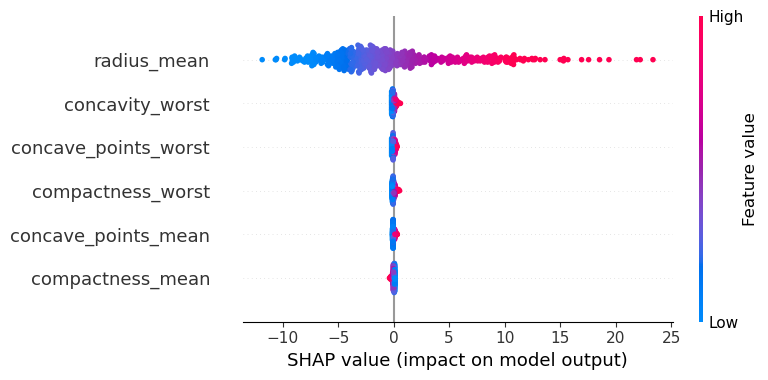

In [ ]:
shap.summary_plot(shap_values, X2, feature_names=feature_list)
plt.show()

In [ ]:
# Explain an individual prediction (e.g., the first instance in the dataset)
shap.force_plot(explainer.expected_value[1], shap_values[1], X2_test[1], feature_names=feature_list)
plt.show()

IndexError: invalid index to scalar variable.

In [ ]:
explainer = shap.Explainer(logisticR2, X2_train)
shap_values = explainer.shap_values(X2_test)

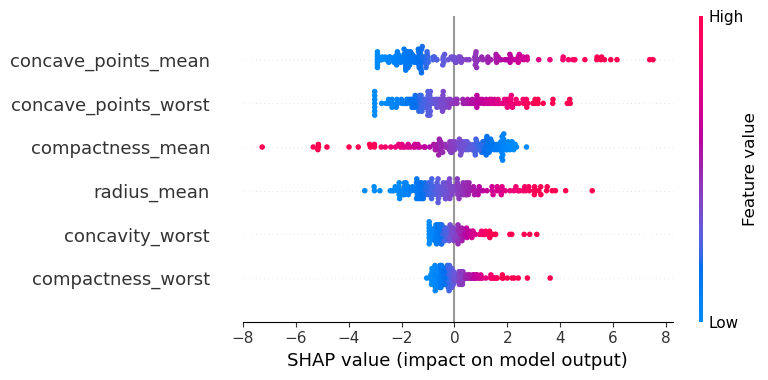

In [ ]:
shap.summary_plot(shap_values, X2_test, feature_names=feature_list)


In [ ]:
# Choose a specific data point to explain (e.g., the first one)
idx = 0

# Create a force plot for that specific prediction
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[idx], X2_test[idx], feature_names=feature_list)


In [ ]:
explainer.expected_value[1]

IndexError: invalid index to scalar variable.

### LIME Library

In [ ]:
import lime
import lime.lime_tabular

In [29]:
X2_test

array([[-4.83132293e-01,  4.88189449e-02, -2.71603231e-01,
        -7.60332839e-02, -7.13329260e-03, -1.93382575e-01],
       [ 1.34906186e+00, -7.88340504e-03,  8.24931429e-01,
        -1.04328486e-01,  1.03444793e-03,  1.01968394e+00],
       [ 3.63584944e-01,  3.71435764e-01,  8.61040076e-01,
        -6.52541593e-02,  5.64608545e-01,  5.88684856e-01],
       ...,
       [-1.20977993e+00,  5.10258759e-01, -2.99481231e-01,
         3.09320420e-01,  4.08910991e-01, -2.30997041e-01],
       [-1.00835213e-01,  1.26694184e+00,  5.08449754e-01,
         9.93794832e-01,  3.55310194e-01,  5.99655741e-01],
       [-3.64195424e-01,  6.11931938e-01, -2.29387974e-01,
         2.26236306e+00,  2.57387272e+00,  6.62346517e-01]])

In [86]:
explainer  =lime.lime_tabular.LimeTabularExplainer(X2_train,feature_names=feature_list,verbose=True,mode='classification')

In [97]:
# need to provid the standedised values not original x_test values
exp =explainer.explain_instance(X2_test[6],logisticR2.predict_proba)
exp.show_in_notebook(show_table=True)

Intercept 0.15971593143849916
Prediction_local [1.18771476]
Right: 0.9999649086937015


In [67]:
y5 = logisticR2.predict(X2_test)
y5

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M'], dtype=object)